In [2]:
!pip install yfinance
!pip install matplotlib
# !pip install pandas==1.3.3

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.2/949.2 kB 33.0 MB/s eta 0:00:00
  Installing build dependencies ... one
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 110.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 139.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 124.1 MB/s eta 0:00:00
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15605 sha256=d07d0a1ede1c7662e22dad4dbc54597a57516ab5840cc60141048d028b014ab9
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/cc/bd/6f/664d62c99327abeef7d86489e6631cbf45b56fbf7ef1d6ef00
  Created wheel for peewee: filename=peewee-3.18.2-cp312-cp312-linux_x86_64.whl size=303862 sha256=220451b8bb0783c96484bd94e49bd24822ce78982561f3fdb7f8ae25acee7f6d
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/d1/

In [3]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objs as go
from plotly.subplots import make_subplots

QUESTION 1

In [4]:
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


QUESTION 2

In [5]:
url_tesla = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_tesla = requests.get(url_tesla).text
soup_tesla = BeautifulSoup(html_tesla, "html.parser")
tables = soup_tesla.find_all("table")
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for table in tables:
    rows = table.find_all("tr")
    for row in rows:
        cols = row.find_all("td")
        if len(cols) == 2:
            date = cols[0].text.strip()
            revenue = cols[1].text.strip().replace("$", "").replace(",", "")
            if revenue != "" and date != "":
                tesla_revenue = tesla_revenue.append({"Date": date, "Revenue": revenue}, ignore_index=True)

tesla_revenue["Revenue"] = pd.to_numeric(tesla_revenue["Revenue"], errors="coerce")
tesla_revenue.dropna(inplace=True)
tesla_revenue.tail()

,Date,Revenue


QUESTION 3

In [6]:
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


QUESTION 4

In [8]:
url_gme = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_gme = requests.get(url_gme).text
soup_gme = BeautifulSoup(html_gme, "html.parser")
tables = soup_gme.find_all("table")
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for table in tables:
    rows = table.find_all("tr")
    for row in rows:
        cols = row.find_all("td")
        if len(cols) == 2:
            date = cols[0].text.strip()
            revenue = cols[1].text.strip().replace("$", "").replace(",", "")
            if revenue != "" and date != "":
                gme_revenue = gme_revenue.append({"Date": date, "Revenue": revenue}, ignore_index=True)

gme_revenue["Revenue"] = pd.to_numeric(gme_revenue["Revenue"], errors="coerce")
gme_revenue.dropna(inplace=True)
gme_revenue.tail()

,Date,Revenue


QUESTION 5

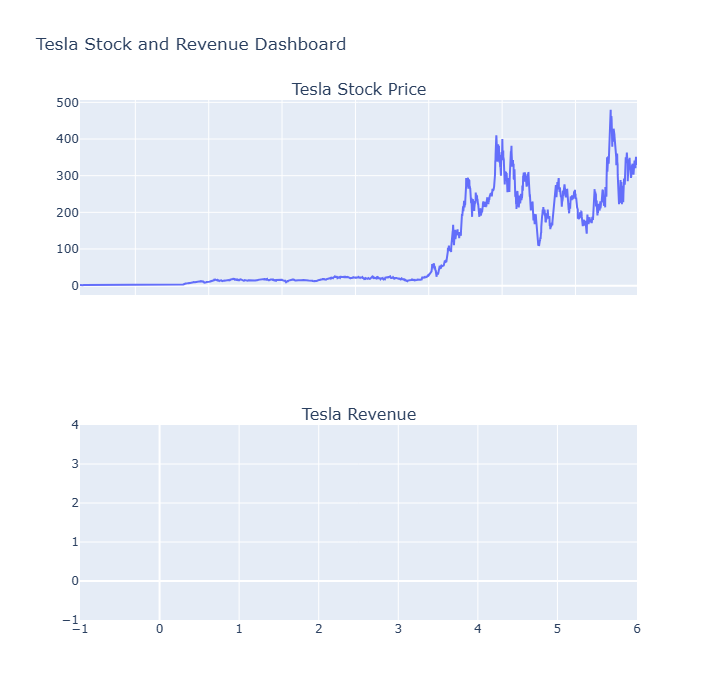

In [10]:
fig_tesla = make_subplots(rows=2, cols=1, shared_xaxes=True,
                           subplot_titles=("Tesla Stock Price", "Tesla Revenue"))

fig_tesla.add_trace(go.Scatter(x=tesla_data["Date"], y=tesla_data["Close"], name="Stock Price"),
                    row=1, col=1)
fig_tesla.add_trace(go.Scatter(x=pd.to_datetime(tesla_revenue["Date"]), y=tesla_revenue["Revenue"], name="Revenue"),
                    row=2, col=1)

fig_tesla.update_layout(title_text="Tesla Stock and Revenue Dashboard", height=700)
fig_tesla.show()

QUESTION 6

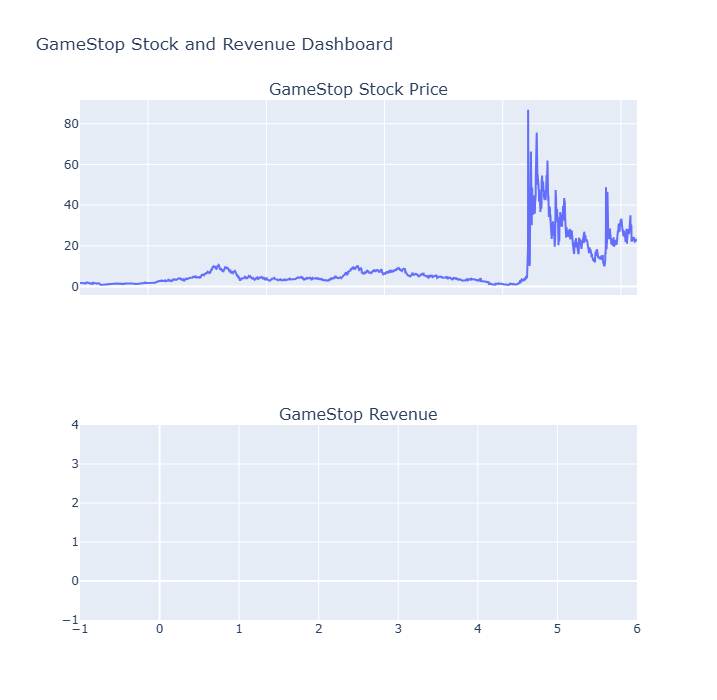

In [11]:
fig_gme = make_subplots(rows=2, cols=1, shared_xaxes=True,
                         subplot_titles=("GameStop Stock Price", "GameStop Revenue"))

fig_gme.add_trace(go.Scatter(x=gme_data["Date"], y=gme_data["Close"], name="Stock Price"),
                  row=1, col=1)
fig_gme.add_trace(go.Scatter(x=pd.to_datetime(gme_revenue["Date"]), y=gme_revenue["Revenue"], name="Revenue"),
                  row=2, col=1)

fig_gme.update_layout(title_text="GameStop Stock and Revenue Dashboard", height=700)
fig_gme.show()